/var/folders/10/v9qwyn2d7mx1blfr1v345wz80000gp/T/ipykernel_44346/3583131680.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/10/v9qwyn2d7mx1blfr1v345wz80000gp/T/ipykernel_44346/3583131680.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


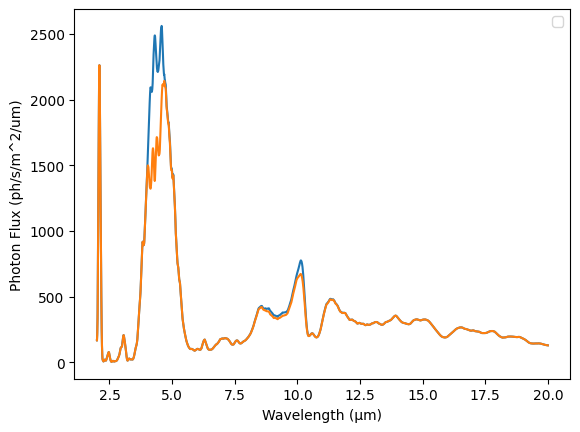

In [58]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
import glob

# Figure 2 
fig=plt.figure()
for file in glob.glob('Jupiterlike/*.dat'):
    # Read the data file
    data = pd.read_csv(file, sep='\s+', skiprows=6,header=None,names=['Wavelength','Flux'])


    # Convert wavelength to Astropy quantity
    wlen= data['Wavelength'].values*u.micron
    
    # Convert spectral irradiance to Astropy quantity
    spectral_irradiance_q = data['Flux'].values * u.W / ( u.m**3)
    
    distance = (10 * u.pc).to(u.m)
    radius = (11.2* const.R_earth).to(u.m)
    scaled_distance = radius**2 / distance**2
    
    scaled_flux=spectral_irradiance_q*scaled_distance

    # Calculate photon flux
    photon_flux = (scaled_flux).to(
        u.ph / (u.s * u.m**2 *u.micron),
        equivalencies=u.spectral_density(wlen)
    ) 
    
    plt.plot(data['Wavelength'],photon_flux)
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('Photon Flux (ph/s/m^2/um)')
    plt.legend()
plt.show()